In [1]:
import datetime
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
# Reading the dataset.

date_parse = lambda dates: pd.datetime.strptime(dates, '%Y')
df_mandi = pd.read_csv('./CMO_MSP_Mandi.csv', parse_dates=['year'], index_col='year', date_parser=date_parse)

print('Length of dataset: ', len(df_mandi))
print('Crops types:', set(df_mandi['Type']))
#df_mandi.loc[df_mandi['commodity'] == 'BAJRI']

Length of dataset:  155
Crops types: {'Rabi Crops', 'Kharif Crops', 'Other Crops'}


C:\Users\vedan\AppData\Local\Temp\ipykernel_39368\744055188.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  date_parse = lambda dates: pd.datetime.strptime(dates, '%Y')


In [3]:
df_mandi.shape
df_mandi.info

<bound method DataFrame.info of                          commodity          Type  msprice  msp_filter
year                                                                 
2012-01-01          PADDY-UNHUSKED  Kharif Crops   1250.0           1
2012-01-01         RICE(PADDY-HUS)  Kharif Crops   1280.0           1
2012-01-01            Jowar_Hybrid  Kharif Crops   1500.0           1
2012-01-01           SORGUM(JAWAR)  Kharif Crops   1520.0           1
2012-01-01                   BAJRI  Kharif Crops   1175.0           1
...                            ...           ...      ...         ...
2016-01-01  Copra (Milling)_Yellow   Other Crops   5950.0           1
2016-01-01     Copra (Ball)_Yellow   Other Crops   6240.0           1
2016-01-01                 COCONUT   Other Crops   1600.0           1
2016-01-01             Jute_Yellow   Other Crops   3200.0           1
2016-01-01               SUGARCANE   Other Crops    230.0           1

[155 rows x 4 columns]>

In [4]:
df_mandi.isna().sum()

commodity      0
Type           0
msprice       10
msp_filter     0
dtype: int64

In [5]:
date_parse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
df_monthly = pd.read_csv('./Monthly_data_cmo.csv', parse_dates=['date'], index_col='date', date_parser=date_parse)

print('Length of dataset:', len(df_monthly), '\n')
#print(type(df_monthly['date']))
print(df_monthly.dtypes)

print('\nSet of unique district names:', set(df_monthly['district_name']))

df_monthly.head()

C:\Users\vedan\AppData\Local\Temp\ipykernel_39368\2296221729.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  date_parse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')


Length of dataset: 62429 

APMC               object
Commodity          object
Year                int64
Month              object
arrivals_in_qtl     int64
min_price           int64
max_price           int64
modal_price         int64
district_name      object
state_name         object
dtype: object

Set of unique district names: {'Beed', 'Latur', 'Hingoli', 'Jalgaon', 'Aurangabad', 'Pune', 'Bhandara', 'Gondiya', 'Sangli', 'Satara', 'Yewatmal', 'Mumbai', 'Ratnagiri', 'Amaravathi', 'Ahmadnagar', 'Osmanabad', 'Wasim', 'Dhule', 'Akola', 'Parbhani', 'Nanded', 'Wardha', 'Gadchiroli', 'Nagpur', 'Nasik', 'Thane', 'Nandurbar', 'Chandrapur', 'Buldhana', 'Raigad', 'Jalna', 'Solapur', 'Kolhapur'}


,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,district_name,state_name
date,,,,,,,,,,
2015-04-01,Ahmednagar,Bajri,2015,April,79,1406,1538,1463,Ahmadnagar,Maharashtra
2016-04-01,Ahmednagar,Bajri,2016,April,106,1788,1925,1875,Ahmadnagar,Maharashtra
2015-04-01,Ahmednagar,Wheat(Husked),2015,April,1253,1572,1890,1731,Ahmadnagar,Maharashtra
2016-04-01,Ahmednagar,Wheat(Husked),2016,April,387,1750,2220,1999,Ahmadnagar,Maharashtra
2015-04-01,Ahmednagar,Sorgum(Jawar),2015,April,3825,1600,2200,1900,Ahmadnagar,Maharashtra


In [6]:
df_monthly.describe()

,Year,arrivals_in_qtl,min_price,max_price,modal_price
count,62429.000000,6.242900e+04,6.242900e+04,6.242900e+04,62429.000000
mean,2015.337503,6.043088e+03,2.945228e+03,3.688814e+03,3296.003989
std,0.690451,3.470331e+04,1.318396e+04,7.662962e+03,3607.792534
min,2014.000000,1.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2015.000000,3.800000e+01,1.250000e+03,1.600000e+03,1450.000000
50%,2015.000000,2.110000e+02,1.976000e+03,2.797000e+03,2425.000000
75%,2016.000000,1.364000e+03,3.900000e+03,4.647000e+03,4257.000000
max,2016.000000,1.450254e+06,3.153038e+06,1.600090e+06,142344.000000


In [7]:
def plot_boxplot(df_commodity):
    plt.figure(figsize=(15, 8))
    ax = sns.boxplot(x=df_commodity.index.date, y=df_commodity['modal_price'], linewidth=2)
    #ax = sns.boxplot(x=df_commodity.index, y=df_commodity['max_price'], linewidth=2)
    plt.xticks(rotation=45)
    plt.xlabel('Date')
    plt.show()

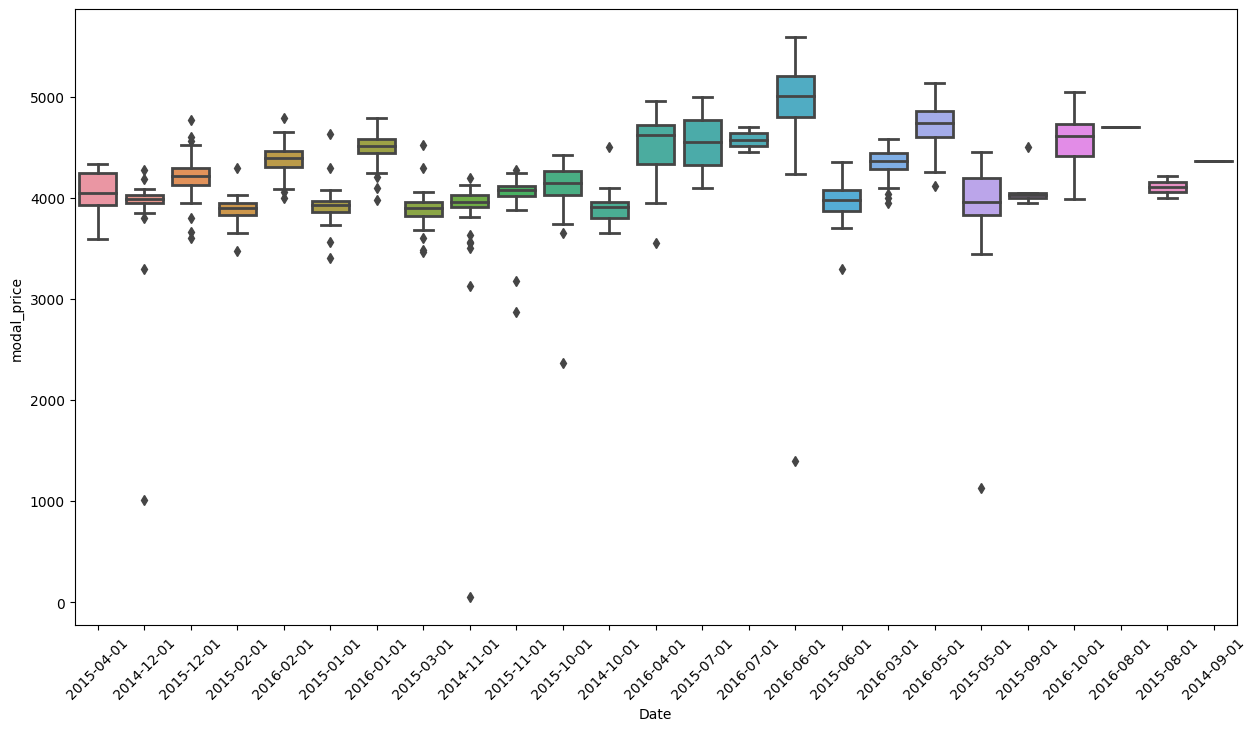

In [8]:
df_cotton = df_monthly.loc[df_monthly['Commodity'] == 'Cotton']
plot_boxplot(df_cotton)

In [9]:
dataframe=df_monthly[['Commodity','modal_price','min_price']]
dataframe

,Commodity,modal_price,min_price
date,,,
2015-04-01,Bajri,1463,1406
2016-04-01,Bajri,1875,1788
2015-04-01,Wheat(Husked),1731,1572
2016-04-01,Wheat(Husked),1999,1750
2015-04-01,Sorgum(Jawar),1900,1600
...,...,...,...
2016-11-01,GRAM,6200,5700
2016-11-01,GREEN GRAM,5000,5000
2016-11-01,BLACK GRAM,6400,4700


In [10]:
# Method to plot prices (max, min and average prices) corresponding to the given commodity and APMC.

def plot_prices(commodity, apmc):
    global df_monthly
    plt.figure(figsize=(15,5))

    plt.subplot(1, 3, 1)
    plt.plot(df_monthly.loc[(df_monthly['Commodity'] == commodity) & (df_monthly['APMC'] == apmc)]['min_price'])
    plt.ylabel('Min price')
    plt.xlabel('Months')
    plt.xticks(rotation=45)
    plt.title('Commodity = %s and APMC = %s' % (commodity, apmc))

    plt.subplot(1, 3, 2)
    plt.plot(df_monthly.loc[(df_monthly['Commodity'] == commodity) & (df_monthly['APMC'] == apmc)]['max_price'])
    plt.ylabel('Max price')
    plt.xlabel('Months')
    plt.xticks(rotation=45)

    plt.subplot(1, 3, 3)
    plt.plot(df_monthly.loc[(df_monthly['Commodity'] == commodity) & (df_monthly['APMC'] == apmc)]['modal_price'])
    plt.ylabel('Avg. price')
    plt.xlabel('Months')
    plt.xticks(rotation=45)

    plt.tight_layout()

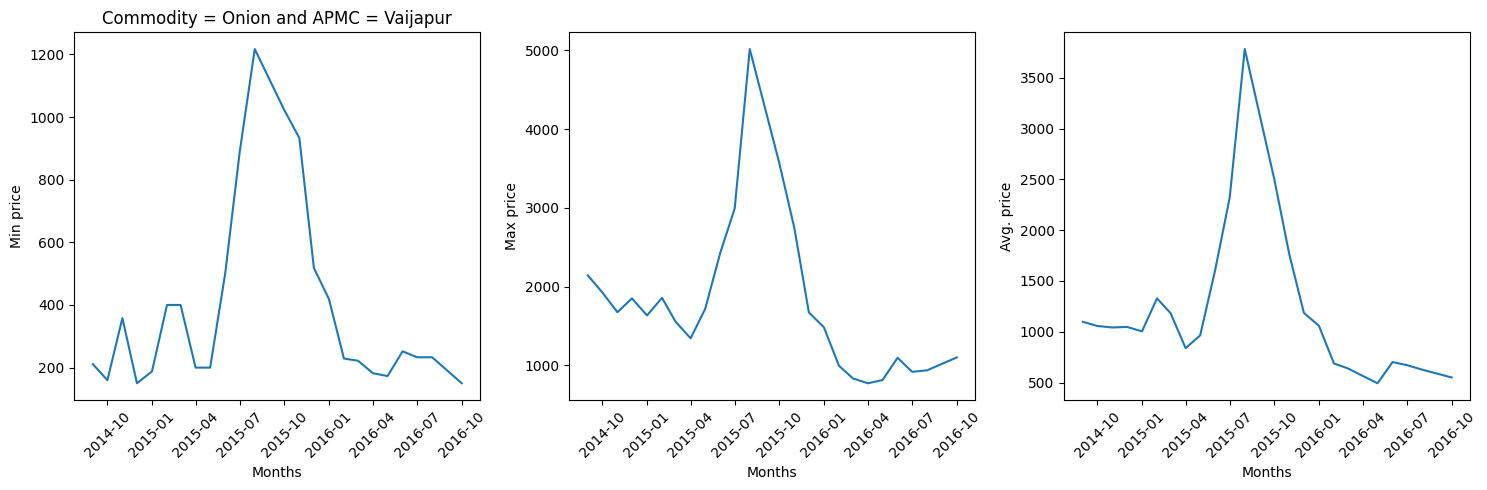

In [11]:
df_monthly.sort_index(axis=0, inplace=True)

# Plot prices for different commodities in 'Ahmednagar' APMC.
plot_prices('Onion', 'Vaijapur')

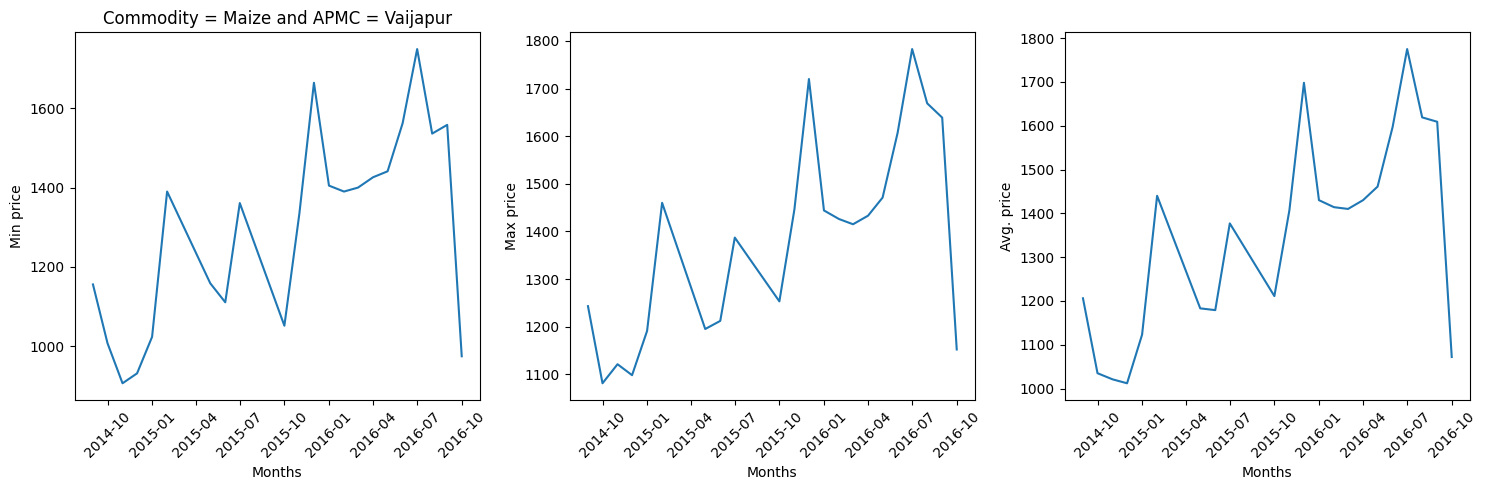

In [12]:
plot_prices('Maize', 'Vaijapur')


In [13]:
def plot_arrival(commodity, apmc):
    global df_monthly
    plt.plot(df_monthly.loc[(df_monthly['Commodity'] == commodity) & (df_monthly['APMC'] == apmc)]['arrivals_in_qtl'])
    plt.ylabel('arrival in quantity')
    plt.xlabel('Months')
    plt.xticks(rotation=45)
    plt.title('Commodity = %s and APMC = %s' % (commodity, apmc))
    plt.show()

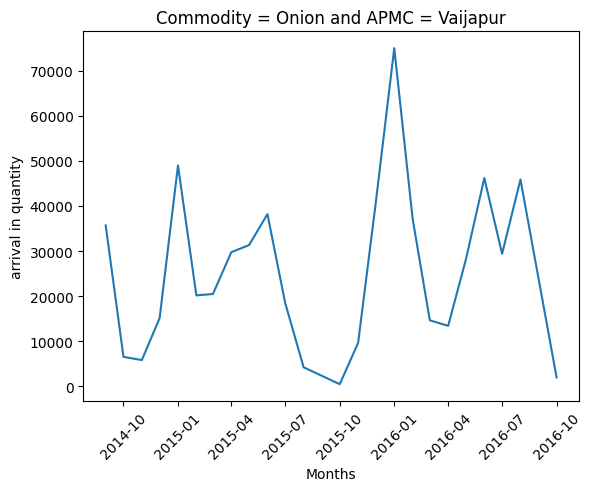

In [14]:
df_monthly.sort_index(axis=1, inplace=True)
plot_arrival('Onion', 'Vaijapur')

In [15]:
import pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [16]:
# prompt: i want to dump this model that i made in pickle

features = ['modal_price', 'min_price', 'max_price', 'arrivals_in_qtl']

X = df_monthly[features]
y = df_monthly['modal_price']  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model initialization and training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [17]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print(f"Train R^2 Score: {train_score}")
print(f"Test R^2 Score: {test_score}")

Train R^2 Score: 0.999709865434235
Test R^2 Score: 0.9998927165069068


In [18]:
with open('model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)